In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import numpy as np

In [18]:
import geopandas as gpd

In [123]:
import geopandas.tools
from shapely.geometry import Point

In [31]:
from os.path import join

In [32]:
SHAPE = "../shape/"

# Outlook

Here we create plots of different nature to reflect the quality of the data obtained from OSM. The aim is to get a list of attributes to be used to map into the shapefiles and to create the networks with.

Data consists of node points, geographical coordinates containing a key and value tags with the information of the underlying data point.

In [2]:
OSM = '/Users/rdora/Downloads/osm.csv'

In [29]:
# Lista de municipios a tomar en cuenta
municipios = np.genfromtxt("../data/municipios.txt", delimiter='\n',
                          dtype='unicode')

In [9]:
# Load the data
df = pd.read_csv(OSM)

## General look of data

Load the data from the shapefiles. Then plot it and scatter plot the OSM data points on top.

In [35]:
# Load shapefiles
fp = join(SHAPE, 'nuevo_leon.shp')

map_df = gpd.read_file(fp, encoding='utf-8')
map_df = map_df[map_df['MUN_NAME'].isin(municipios)]

In [40]:
sns.scatterplot?

In [45]:
df[df.tag_key=='amenity'].shape

(35742, 8)

In [63]:
df[df.tag_key=='highway']['tag_value'].unique()

array(['primary_link', 'primary', 'footway', 'steps', 'trunk', 'tertiary',
       'secondary', 'trunk_link', 'residential', 'secondary_link',
       'motorway', 'motorway_link', 'unclassified', 'service',
       'tertiary_link', 'pedestrian', 'track', 'road', 'living_street',
       'path', 'bus_guideway', 'bridleway', 'construction', 'proposed',
       'residential_link', 'cycleway', 'escape', 'rest_area', 'raceway',
       'bus_stop', 'services'], dtype=object)

In [70]:
pal = sns.color_palette("hls", 9)

In [180]:
main_roads = ['motorway', 'trunk',
              'primary', 'secondary']

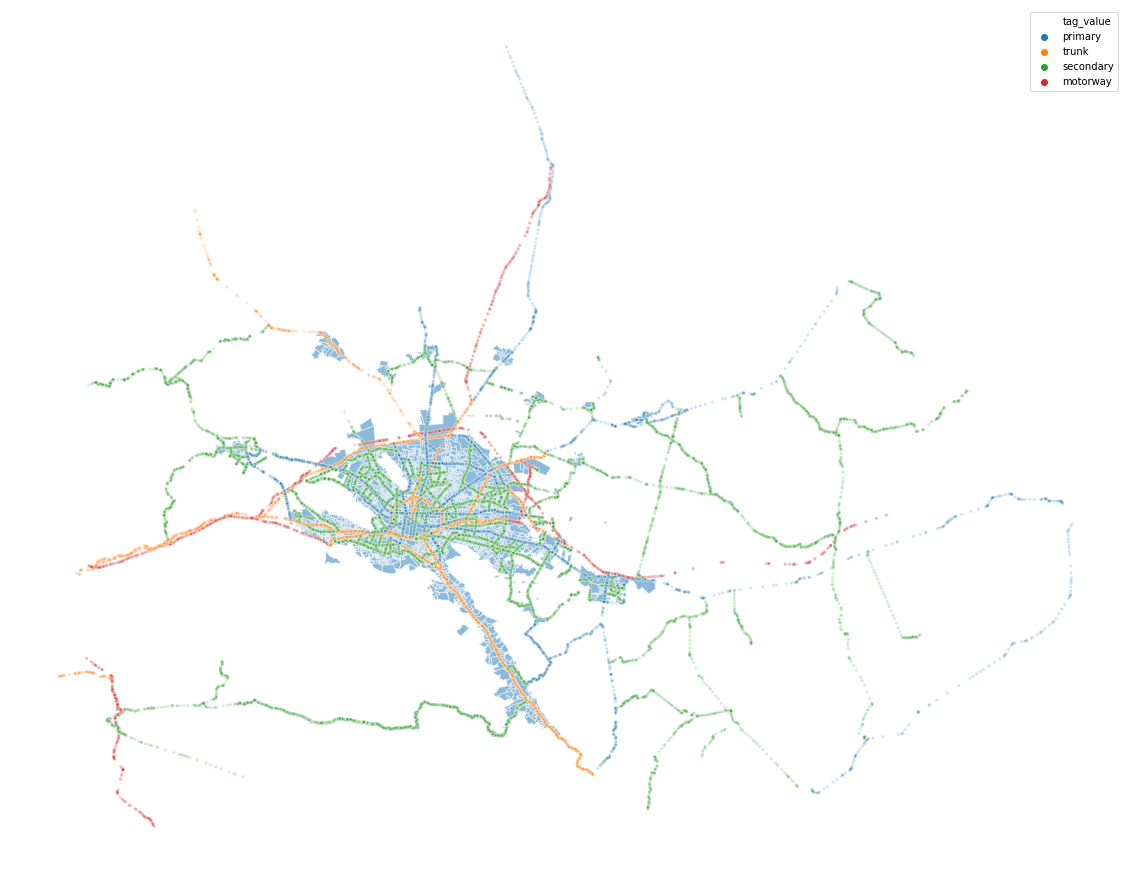

In [181]:
df_filter = df[df.tag_value.isin(main_roads)]

# Plot the points on the map

fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
map_df.plot(ax=ax, alpha=0.5, edgecolor='white')
sns.scatterplot(x='lon', y='lat', hue='tag_value', data=df_filter, s=10, alpha=0.2,
               ax=ax)

## Amenities, shops and leisure spots in Monterrey

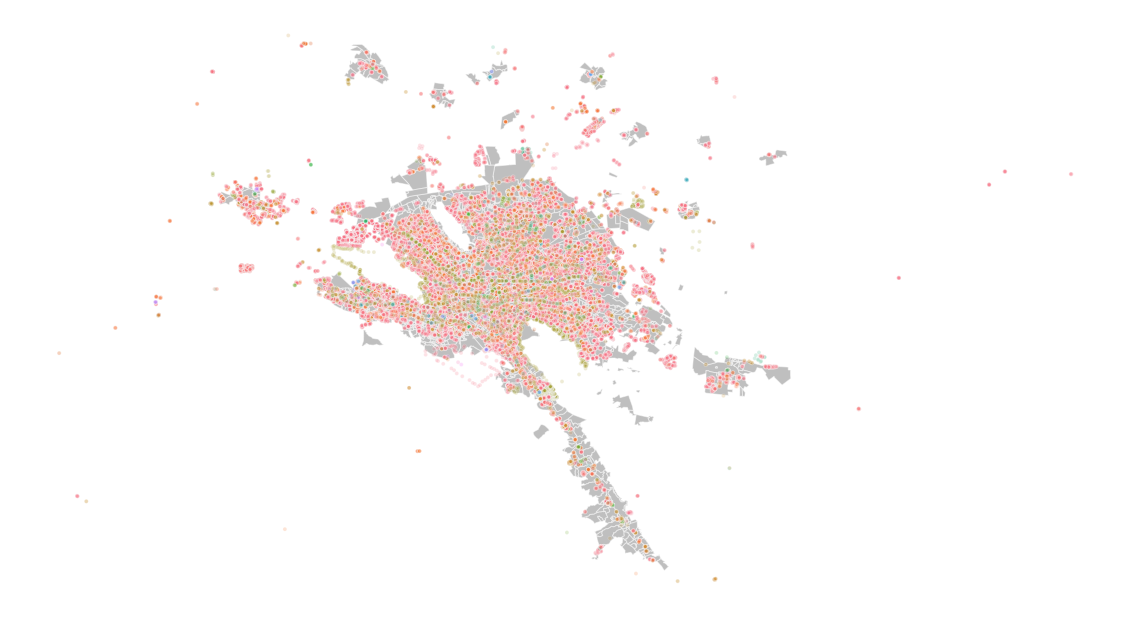

In [122]:
df_filter = df[df.tag_key!='highway']

# Plot the points on the map

fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
map_df.plot(ax=ax, alpha=0.5, edgecolor='white', facecolor='gray')
sns.scatterplot(x='lon', y='lat', hue='tag_value', data=df_filter, s=15, alpha=0.2,
               ax=ax, legend=False)

## Merge Nieghborhood data with OSM data

In [125]:
shape = map_df

columns = ['OBJECTID', 'MUN_NAME', 'SETT_NAME', 'Shape_Area', 'geometry']

rename = {'OBJECTID': 'n_id',
         'MUN_NAME': 'mun_name',
         'SETT_NAME': 'neighborhood',
         'Shape_Area': 'area'}

shape = shape[columns]

df["geometry"] = df.apply(lambda row: Point(row["lon"],
                                            row["lat"]), axis=1)

df_geo = gpd.GeoDataFrame(df, geometry="geometry")

In [144]:
df_geo.shape

(494750, 9)

In [142]:
shape = shape.rename(columns=rename)

df_geo = geopandas.tools.sjoin(df_geo, shape, how="left")

In [149]:
df_geo.shape

(494750, 14)

In [152]:
df.head()

,type,id,lon,lat,version,visible,tag_key,tag_value,geometry
0,node,269701904,-100.251138,25.731145,4,True,highway,primary_link,POINT (-100.2511378 25.7311447)
1,node,269701904,-100.251138,25.731145,4,True,highway,primary,POINT (-100.2511378 25.7311447)
2,node,269701905,-100.254961,25.728632,3,True,highway,primary_link,POINT (-100.2549614 25.7286321)
3,node,269701905,-100.254961,25.728632,3,True,highway,primary,POINT (-100.2549614 25.7286321)
4,node,269701906,-100.259171,25.725525,3,True,highway,primary,POINT (-100.2591713 25.7255252)


In [157]:
df_geo = df_geo.drop(['geometry', 'index_right'], axis=1)
df = pd.DataFrame(df_geo)

### Save DataFrame

In [159]:
df.to_csv("../data/osm_geo.csv", index=False)

# Plot Data into neighborhoods

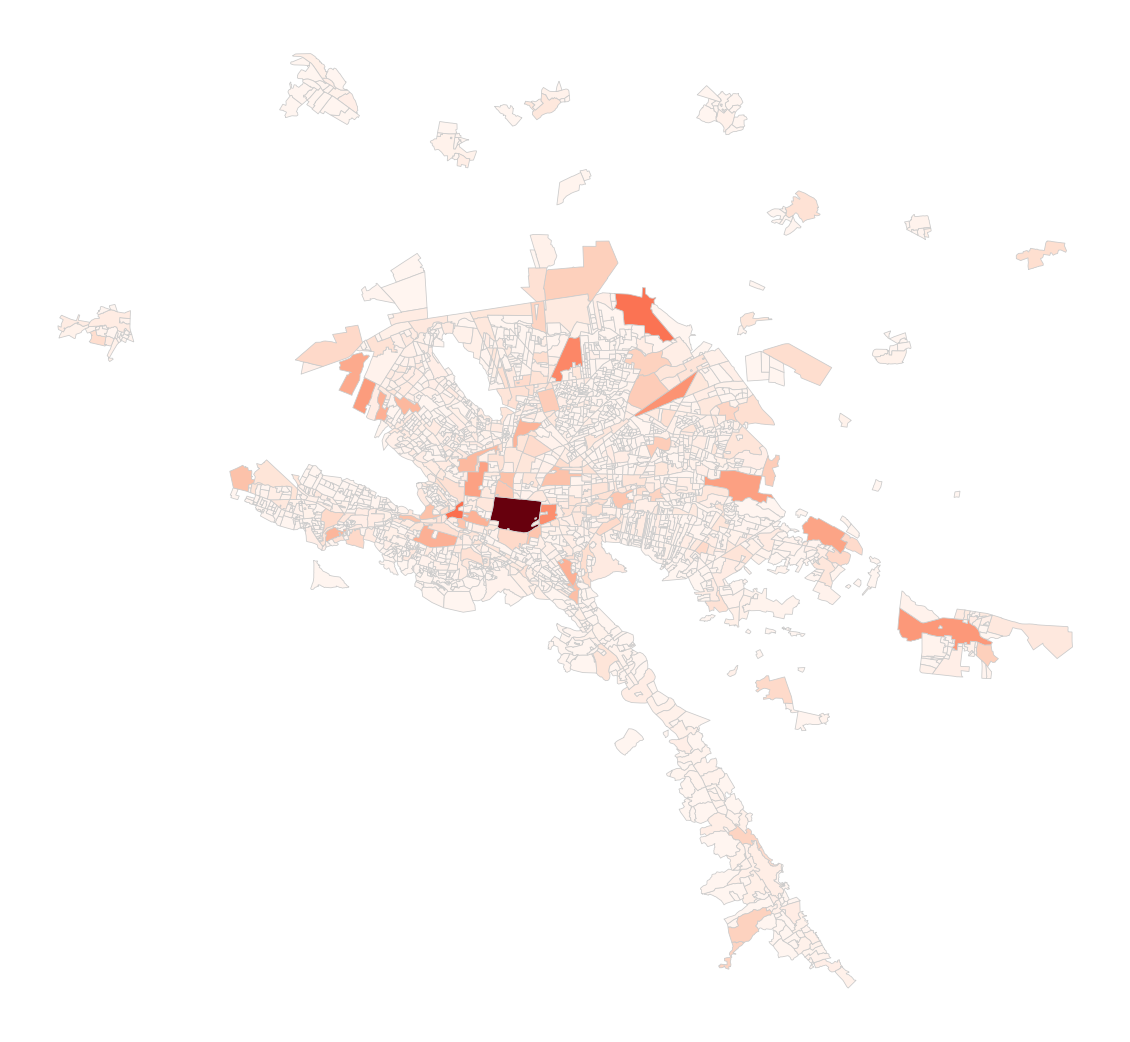

In [186]:
# Group by neighborhood, data tu map
df_filter = df[df.tag_value.isin(main_roads)]
df_group = df_filter.groupby('n_id').count()[['tag_value']]

# Plot the data to the map
var = 'tag_value'
merged = shape.set_index('n_id').join(df_group)
fig, ax = plt.subplots(figsize=(20, 20))
merged.plot(column=var, cmap='Reds', linewidth=0.8,
              ax=ax, edgecolor='0.8', legend=False)
ax.axis('off');

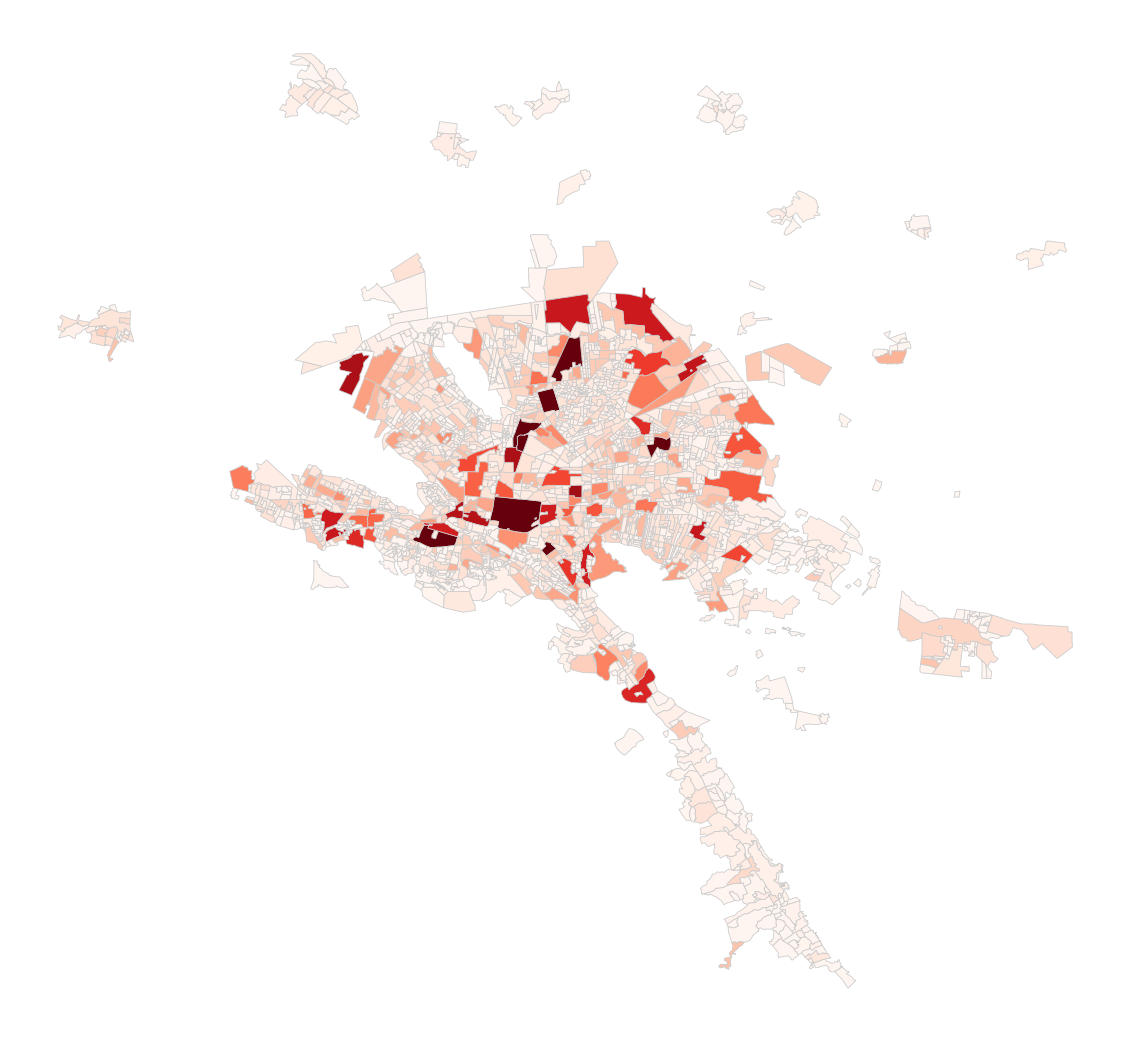

In [194]:
# Group by neighborhood, data tu map
df_filter = df[df.tag_key!='highway']
df_group = df_filter.groupby('n_id').count()[['tag_value']]

# Plot the data to the map
var = 'tag_value'
merged = shape.set_index('n_id').join(df_group)
merged = merged.fillna(0)
fig, ax = plt.subplots(figsize=(20, 20))
vmin, vmax = 0, 500
merged.plot(column=var, cmap='Reds', linewidth=0.8,
              ax=ax, edgecolor='0.8', legend=False,
           vmin=vmin, vmax=vmax)
ax.axis('off');

## No Highway attributes

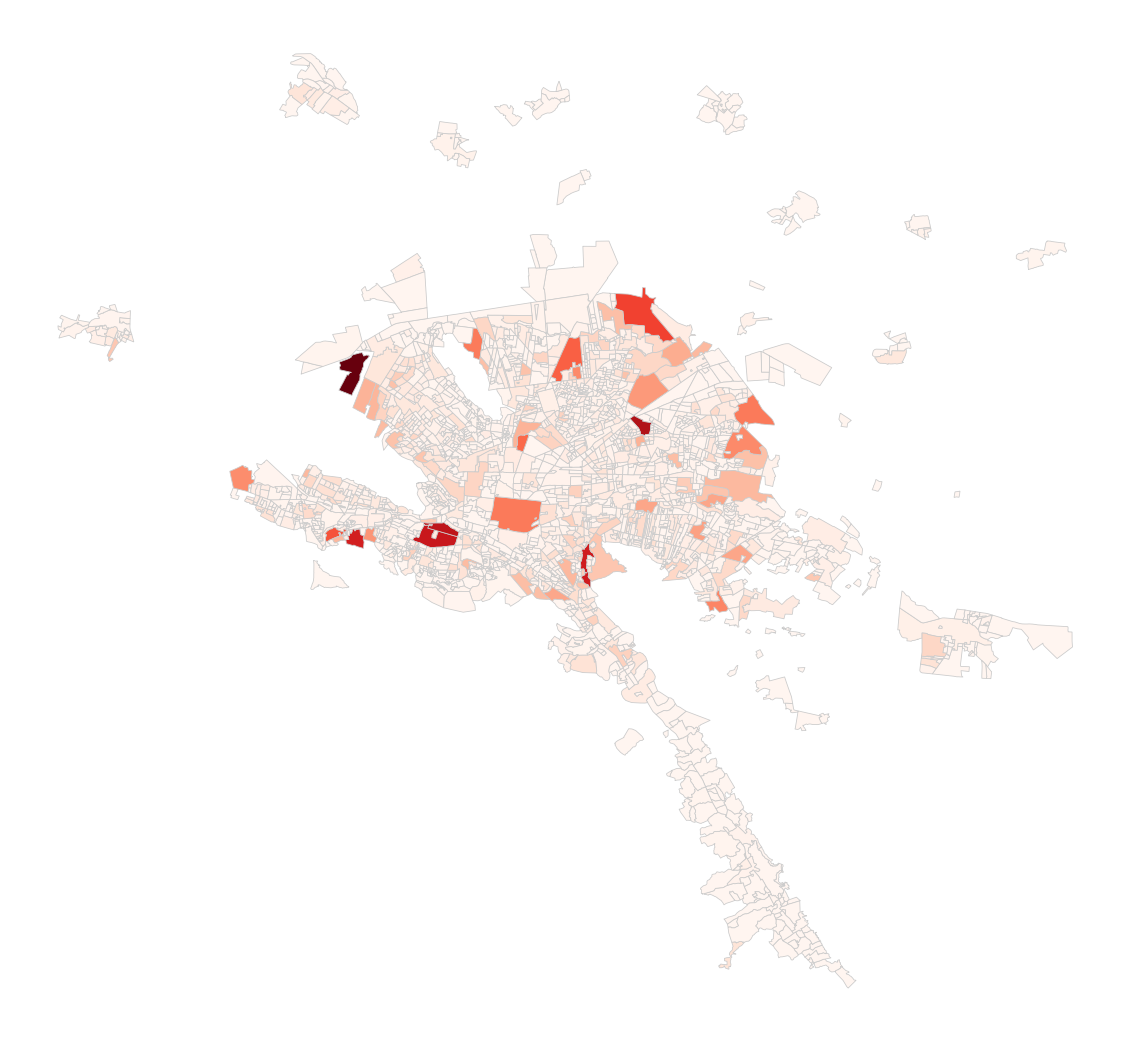

In [216]:
# Group by neighborhood, data tu map
df_filter = df[df.tag_value=='park']
df_group = df_filter.groupby('n_id').count()[['tag_value']]

# Plot the data to the map
var = 'tag_value'
merged = shape.set_index('n_id').join(df_group)
merged = merged.fillna(0)
fig, ax = plt.subplots(figsize=(20, 20))
#vmin, vmax = 0, 5
merged.plot(column=var, cmap='Reds', linewidth=0.8,
              ax=ax, edgecolor='0.8', legend=False)
ax.axis('off');